In [19]:
import math
# from autograd import jacobian
from numpy import genfromtxt
import scipy
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import cm
from scipy.optimize import Bounds
from mpl_toolkits.mplot3d import Axes3D
#matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family ='Arial',size=7)
#from palettable.colorbrewer.sequential import Blues_8
#colors = Blues_8.mpl_colormap(np.linspace(0,6))
import pandas as pd
import numpy as np
from scipy.stats import kstest
from scipy.stats import ks_2samp
import random
# import numpyro
# import numpyro.distributions as dist
import seaborn as sns

In [20]:
matrix=np.array([[0,1,2],[4,5,6],[8,9,10]])
oper=matrix.T @ matrix
oper2=matrix @ matrix.T
print(matrix)
print(oper)
print(oper2)

[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]]
[[ 80  92 104]
 [ 92 107 122]
 [104 122 140]]
[[  5  17  29]
 [ 17  77 137]
 [ 29 137 245]]


In [21]:
## Read data from 

CTRLd = pd.read_csv('CTRL_OJ-Distribution-1.csv')
XRTd = pd.read_csv('XRT_OJ-Distribution-1.csv')
XRTTEd = pd.read_csv('XRTTE_OJ-Distribution-1.csv')


In [22]:
# fig,ax = plt.subplots(1,3,figsize = (12, 3), 
#                       constrained_layout=True
#                      )

CTRLSlice11=[]
XRTSlice11=[]
XRTTESlice11=[]

for i in range(0, len(CTRLd.Slice1)):
    CTRLSlice11.append(CTRLd.Slice1[i]/sum(CTRLd.Slice1))
    
for i in range(0, len(XRTd.Slice1)):
    XRTSlice11.append(XRTd.Slice1[i]/sum(CTRLd.Slice1))
    
for i in range(0, len(XRTTEd.Slice1)):
    XRTTESlice11.append(XRTTEd.Slice1[i]/sum(CTRLd.Slice1))


In [23]:
print(len(XRTTEd.Orientation))

180


In [24]:
##Read data from files from Orientation distribution (OrientationJ, imageJ)

listAll=os.listdir('/Users/lnunezal/Library/CloudStorage/OneDrive-purdue.edu/tepoleLab/images/CSV_hist')

Direct3C={}
Direct3XC={}
Direct3XTP={}
Direct3TP={}

lol={'orient': [], 'slice': [], 'slicenorm': []}

c1=0
c2=0
c3=0
c4=0

for i in listAll:
    # print(i)
    patheach='/Users/lnunezal/Library/CloudStorage/OneDrive-purdue.edu/tepoleLab/images/CSV_hist/'+i
    if os.path.isdir(patheach) == True:
        for j in os.listdir(patheach):
            specimenFilee=pd.read_csv(patheach+'/'+j)
            specimenFile = specimenFilee.to_numpy()[:,0:]
            orient=specimenFile[:,0]
            slice1=specimenFile[:,1]
            slice1norm=np.zeros((len(slice1)))
            for k in range(0, len(slice1)):
                slice1norm[k]=slice1[k]/sum(slice1)
            linee={'orient': orient, 'slice': slice1, 'slicenorm': slice1norm}
            if i == '3C_CSV':
                Direct3C[c1]=linee
                c1+=1
            elif i == '3TP_CSV':
                Direct3TP[c2]=linee
                c2+=1
            elif i == '3XC_CSV':
                Direct3XC[c3]=linee
                c3+=1
            else:
                Direct3XTP[c4]=linee
                c4+=1



In [25]:
OrientProm3C=np.zeros((len(XRTTEd.Orientation)))
OrientProm3XC=np.zeros((len(XRTTEd.Orientation)))
OrientProm3XTP=np.zeros((len(XRTTEd.Orientation)))
OrientProm3TP=np.zeros((len(XRTTEd.Orientation)))


for i in range(180):
    for j in range(len(Direct3C)):
        # sum3C+=Direct3C[j]['slice'][i]
        OrientProm3C[i]+=(1/len(Direct3C))*(Direct3C[j]['slice'][i])
    for k in range(len(Direct3XC)):
        OrientProm3XC[i]+=(1/len(Direct3XC))*(Direct3XC[k]['slice'][i])
    for l in range(len(Direct3XTP)):
        OrientProm3XTP[i]+=(1/len(Direct3XTP))*(Direct3XTP[l]['slice'][i])
    for m in range(len(Direct3TP)):
        OrientProm3TP[i]+=(1/len(Direct3TP))*(Direct3TP[m]['slice'][i])

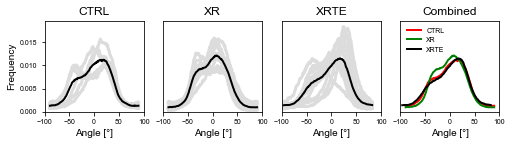

In [26]:
## Plot all histograms of the same group

fig,ax = plt.subplots(1,4,figsize = (7, 1.9), 
                      constrained_layout=True
                     )

# for i in range(len(Direct3C[0]['slice'])+len(Direct3XC[0]['slice'])+len(Direct3TP[0]['slice'])+len(Direct3XTP[0]['slice'])):
for i in range(16):

    if i < len(Direct3C):
        ax[0].plot(Direct3C[i]['orient'],(1/np.sum(Direct3C[i]['slice']))*Direct3C[i]['slice'], color='gainsboro', linewidth=3)
        ax[0].set_title("CTRL", fontsize=12)
        ax[0].set_ylabel("Frequency",fontsize=10)
        ax[0].set_xlabel("Angle [°]", fontsize=10)

    if i < len(Direct3XC):
        ax[1].plot(Direct3XC[i]['orient'],(1/np.sum(Direct3XC[i]['slice']))*Direct3XC[i]['slice'], color='gainsboro', linewidth=3)
        ax[1].set_title("XR", fontsize=12)
        #ax[1].set_ylabel("W")
        ax[1].set_xlabel("Angle [°]", fontsize=10)

    if i < len(Direct3XTP):
        # print(np.sum(Direct3C[i]['orient']))
        ax[2].plot(Direct3XTP[i]['orient']-7*np.ones(len(Direct3XTP[0]['orient'])),(1/np.sum(Direct3XTP[i]['slice']))*Direct3XTP[i]['slice'], color='gainsboro', linewidth=3)
        ax[2].set_title("XRTE", fontsize=12)
        #ax[2].set_ylabel("W")
        ax[2].set_xlabel("Angle [°]", fontsize=10)

    # if i < len(Direct3XTP):
    #     ax[3].plot(Direct3XTP[i]['orient'],Direct3XTP[i]['slice'], color='gainsboro', linewidth=3)
    #     ax[3].set_title("XRT_TE")
    #     #ax[3].set_ylabel("W")
    #     ax[3].set_xlabel("Angle [°]")

    # plt.savefig("Orient distrib.png",dpi=300)
# print(Direct3C[2]['orient'])
ax[0].plot(Direct3C[0]['orient'], (1/np.sum(OrientProm3C))*OrientProm3C,color='0',linewidth=2)
ax[1].plot(Direct3XC[0]['orient'], (1/np.sum(OrientProm3XC))*OrientProm3XC,color='0',linewidth=2)
ax[2].plot(Direct3XTP[0]['orient']-7*np.ones(len(Direct3XTP[0]['orient'])), (1/np.sum(OrientProm3XTP))*OrientProm3XTP,color='0',linewidth=2)
# ax[3].plot(Direct3XTP[0]['orient'], OrientProm3XTP,color='0',linewidth=4)

ax[0].set_ylim([0,0.0195])
ax[0].set_xlim([-100,100])
ax[1].set_ylim([0,0.0195])
ax[1].set_xlim([-100,100])
ax[1].get_yaxis().set_visible(False)
ax[2].set_ylim([0,0.0195])
ax[2].set_xlim([-100,100])
ax[2].get_yaxis().set_visible(False)
ax[3].set_ylim([0,0.0195])
ax[3].set_xlim([-100,100])
ax[3].get_yaxis().set_visible(False)

## Plot the 4 average curves 

ax[3].plot(Direct3C[0]['orient'], OrientProm3C/np.sum(OrientProm3C),color='r',linewidth=2,label ='CTRL')
ax[3].plot(Direct3XC[0]['orient'], OrientProm3XC/np.sum(OrientProm3XC),color='g',linewidth=2,label ='XR')
# plt.plot(Direct3TP[0]['orient'], OrientProm3TP/np.sum(OrientProm3TP),color='b',linewidth=2,label ='TE')
ax[3].plot(Direct3XTP[0]['orient']-7*np.ones(len(Direct3XTP[0]['orient'])), OrientProm3XTP/np.sum(OrientProm3XTP),color='0',linewidth=2,label ='XRTE')
ax[3].set_xlabel("Angle [°]", fontsize=10)
ax[3].set_title("Combined", fontsize=12)
# ax[3].set_xticklabels([-100,0,100],fontsize = 15)

# plt.step(Direct3C[0]['orient'],OrientProm3C/np.sum(OrientProm3C),color='r',linewidth=3,label ='CTRL')

# plt.xticks(fontsize = 15)
# rcParams["legend.frameon"]
plt.legend(fontsize=7,loc='upper left',frameon=False)
# plt.savefig("orient_distrib2.png",dpi=300)



plt.savefig("Orient_distribLABELIN.png",dpi=300)

plt.show()
    

       

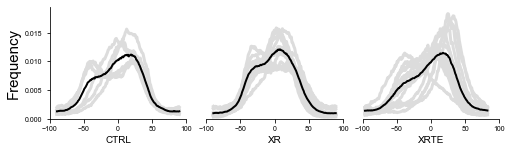

In [27]:
## Plot all histograms of the same group

fig,ax = plt.subplots(1,3,figsize = (7, 2), 
                      constrained_layout=True
                     )

# for i in range(len(Direct3C[0]['slice'])+len(Direct3XC[0]['slice'])+len(Direct3TP[0]['slice'])+len(Direct3XTP[0]['slice'])):
for i in range(16):

    if i < len(Direct3C):
        ax[0].plot(Direct3C[i]['orient'],(1/np.sum(Direct3C[i]['slice']))*Direct3C[i]['slice'], color='gainsboro', linewidth=3)
        # ax[0].set_title("CTRL", fontsize=10)
        ax[0].set_ylabel("Frequency",fontsize=15)
        ax[0].set_xlabel("CTRL", fontsize=10)

    if i < len(Direct3XC):
        ax[1].plot(Direct3XC[i]['orient'],(1/np.sum(Direct3XC[i]['slice']))*Direct3XC[i]['slice'], color='gainsboro', linewidth=3)
        # ax[1].set_title("XR", fontsize=10)
        #ax[1].set_ylabel("W")
        ax[1].set_xlabel("XR", fontsize=10)

    if i < len(Direct3XTP):
        # print(np.sum(Direct3C[i]['orient']))
        ax[2].plot(Direct3XTP[i]['orient']-7*np.ones(len(Direct3XTP[0]['orient'])),(1/np.sum(Direct3XTP[i]['slice']))*Direct3XTP[i]['slice'], color='gainsboro', linewidth=3)
        # ax[2].set_title("XRTE", fontsize=10)
        #ax[2].set_ylabel("W")
        ax[2].set_xlabel("XRTE", fontsize=10)

    # if i < len(Direct3XTP):
    #     ax[3].plot(Direct3XTP[i]['orient'],Direct3XTP[i]['slice'], color='gainsboro', linewidth=3)
    #     ax[3].set_title("XRT_TE")
    #     #ax[3].set_ylabel("W")
    #     ax[3].set_xlabel("Angle [°]")

    # plt.savefig("Orient distrib.png",dpi=300)
# print(Direct3C[2]['orient'])
ax[0].plot(Direct3C[0]['orient'], (1/np.sum(OrientProm3C))*OrientProm3C,color='0',linewidth=2)
ax[1].plot(Direct3XC[0]['orient'], (1/np.sum(OrientProm3XC))*OrientProm3XC,color='0',linewidth=2)
ax[2].plot(Direct3XTP[0]['orient']-7*np.ones(len(Direct3XTP[0]['orient'])), (1/np.sum(OrientProm3XTP))*OrientProm3XTP,color='0',linewidth=2)
# ax[3].plot(Direct3XTP[0]['orient'], OrientProm3XTP,color='0',linewidth=4)

ax[0].set_ylim([0,0.0195])
ax[0].set_xlim([-100,100])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
# ax[0].spines['left'].set_visible(False)
ax[1].set_ylim([0,0.0195])
ax[1].set_xlim([-100,100])
ax[1].get_yaxis().set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[2].set_ylim([0,0.0195])
ax[2].set_xlim([-100,100])
ax[2].get_yaxis().set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['left'].set_visible(False)




plt.savefig("OrientDistSHPEAbstract.png",dpi=300)

plt.show()
    

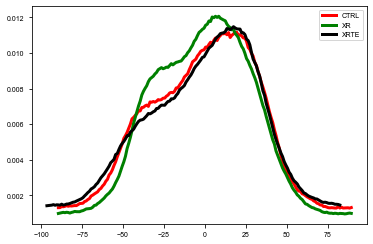

In [28]:
## Plot the 4 average curves 

plt.plot(Direct3C[0]['orient'], OrientProm3C/np.sum(OrientProm3C),color='r',linewidth=3,label ='CTRL')
plt.plot(Direct3XC[0]['orient'], OrientProm3XC/np.sum(OrientProm3XC),color='g',linewidth=3,label ='XR')
# plt.plot(Direct3TP[0]['orient'], OrientProm3TP/np.sum(OrientProm3TP),color='b',linewidth=3,label ='TE')
plt.plot(Direct3XTP[0]['orient']-7*np.ones(len(Direct3XTP[0]['orient'])), OrientProm3XTP/np.sum(OrientProm3XTP),color='0',linewidth=3,label ='XRTE')

# plt.step(Direct3C[0]['orient'],OrientProm3C/np.sum(OrientProm3C),color='r',linewidth=3,label ='CTRL')


plt.legend()
plt.savefig("orient_distrib2.png",dpi=300)

plt.show()